# Lesson 09 - Linear Regression

### The following topics are discussed in this notebook:
* Linear Regression using scikit-learn.
* Simple Linear Regression
* Multiple Linear Regression

### Additional Resources
* [Hands-On Machine Learning, Ch 4](https://github.com/ageron/handson-ml/blob/master/04_training_linear_models.ipynb)
* [Introduction to Machine Learning, Ch 3](http://www-bcf.usc.edu/~gareth/ISL/ISLR%20Seventh%20Printing.pdf)


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## Simple Linear Regresion

In a simple linear regression task, we have a single feature, `x`, from which we wish to predict a continuous, real-valued label `y`.

* Assume that our training set has $n$ observations.
* Denote the observed values of the training feature (predictor),input as $x_1, x_2, ..., x_n$.
* Denote the observed values of the label (response variable),output as $y_1, y_2, ..., y_n$.
* We assume that our model has the following form: $\large \hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x$.
* In the model above, $\hat{\beta}_0$ and $\beta_1$ are model parameters that are learned from the training data. 
* $\hat{y}$ represents the predicted value of $y$ given some value of $x$. 

### Training the Model

* Let $b_0$ and $b_1$ be a pair of (not necessarily optimal) parameter values used to define a model $\large \hat{y} = {b}_0 + {b}_1 x$.
* For each training observation $(x_i, y_i)$, let $\large\hat{y}_i = b_0 + b_1 x_i$. 
* For each $i$, calculate the error (residual) $\large\hat{e}_i = \hat{y}_i - y_i$. 
* The goal of the algorithm is to find the parameter values that minimize the Sum of Squared Errors objective function, given by: $ \large SSE = \sum \hat{e}_i^2 $
* We will denote the optimal parameter values by $\hat{\beta}_0$ and $\hat{\beta}_1$.

In [3]:
%matplotlib inline
%run -i examples/example01.py

A Jupyter Widget

## SLR with Scikit-Learn

We will now see how to use scikit-learn to create a simple linear regression model. 

We begin by generating a synthetic dataset. 


In [4]:
# Generate Data
np.random.seed(164)
x1 = np.random.uniform(low=0,high=10,size=12)
y = 5 + 1.4 * x + np.random.normal(0,2.5,N)

# X needs to be a 2D array or DataFrame
X = x1.reshape(12,1)   # not 2 times 6?

print(X)
print(y)

[[ 3.56982732]
 [ 3.06702331]
 [ 2.78252504]
 [ 8.25340157]
 [ 4.86064749]
 [ 7.11779768]
 [ 0.789842  ]
 [ 7.8037005 ]
 [ 5.48537482]
 [ 1.56160812]
 [ 6.05804671]
 [ 3.08240358]]
[  9.76438423  10.79366537   9.71275431  18.17300312  13.90949059
  11.27331068   9.03144435  17.5828503   13.05517721   8.15301336
  12.83103917  12.05246864]


We will now use Scikit-Learn's `LinearRegression` module to create the slr model. 

In [5]:
# We create an instance of the LinearRegression() class.
# Then we call its fit() method. 
slr = LinearRegression() # would be like this, LinearRegression(X,y), in other class such as splitClassifier
slr.fit(X,y)

# We print the model parameters. 
print('Intercept:', slr.intercept_) # slr.intercept_ is an attribute
print('Slope:', slr.coef_)

Intercept: 7.17572409915
Slope: [ 1.10640235]


We will plot the dataset, along with the line represented by the model. 

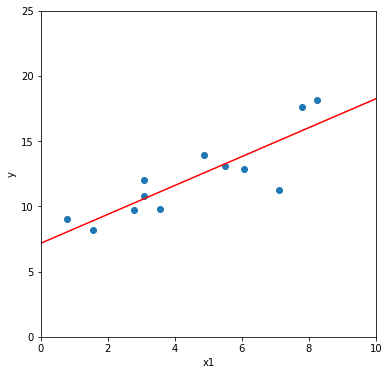

In [6]:
b = slr.intercept_
m = slr.coef_[0]

plt.close()
plt.scatter(x1,y)
plt.plot([0,10],[m*0 + b, m*10 + b], c='r')
plt.xlim([0,10])
plt.ylim([0,25])
plt.xlabel('x1')
plt.ylabel('y')
plt.show()

We know that the parameter values were selected in order to minimize SSE for the given training data. Let's determine the SSE for the model we have generated. This will require us to use the `predict()` method built into our model. 

In [7]:
y_hat = slr.predict(X)    # by doing this, we dont have to use a loop
print(type(y_hat))
residuals = y - y_hat
SSE = np.sum(residuals**2)
print('Training SSE:', SSE)

<class 'numpy.ndarray'>
Training SSE: 29.7395469861


## r-Squared

Wehn working with linear regression, the optimal parameter values are determined by minimizing the objective function SSE. However, a different value is typically used to assess the quality of a regression model. This alternate scoring method is called the called the **r-squared value**. It is defined as follows:

* $ \large SST = \sum (y_i - \bar y ) ^2 $ #range of y

* $ \large SSE = \sum \hat{e}_i^2 = \sum (y_i - \hat {y}_i ) ^2 $

* $ \large r^2 = 1 - \frac{SSE}{SST}$

Since SST is a constant for the supplied training data, minimizing SSE is equivalent to maximizing $r^2$. The score supplied by $r^2$ has two advantages over SSE:

1. The value $r^2$ is "normalized" to always be between 0 and 1. A value close to 1 indicates that our model provides a very good fit for the data. 
2. The $r^2$ value has a useful interpretation not present with SSE. We can think of $r^2$ as reporting the proportion of the variance in the training labels that has been accounted for by our model. 

We will now directly compute the $r^2$ value for our model. 

In [8]:
SST = np.sum((y - np.mean(y))**2)
r2 = 1 - SSE / SST
print(r2)

0.729881423842


Scikit-Learn `LinearRegression` objects do not have an `r_squared` attribute, but they do contain a method called `score` that can be used to calcuate $r^2$.

In [9]:
print(slr.score(X,y)) # this also calculates r^2 of the data 

0.729881423842


## Multiple Regression

In a multiple linear regression task, we have several features, $X = [x^{(1)}, x^{(2)}, ..., x^{(p)}]$, from which we wish to predict a single continuous, real-valued label `y`.

* Assume that our training set has $n$ observations.
* Denote the values of the training features for observation number $i$ as $X_i = [x^{(1)}_i, x^{(2)}_i, ..., x^{(p)}_i]$.
* Denote the value of the label for observation $i$ as $y_i$. 
* We assume that our model has the following form: $\large \hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x^{(1)} + \hat{\beta}_2 x^{(2)} ... + \hat{\beta}_p x^{(p)}$.
* In the model above, $\hat{\beta}_0$, $\hat{\beta}_1$, ..., $\hat{\beta}_p$ are model parameters that are learned from the training data. 
* $\hat{y}$ represents the predicted value of $y$ given some input vector $X = [x^{(1)}, x^{(2)}, ..., x^{(p)}]$. 

### Training the Model

* Let $b_0, b_1, ..., b_p$ be a set (not necessarily optimal) parameter values used to define a model $\large \hat{y} = {b}_0 + {b}_1 x^{(1)} + {b}_2 x^{(2)} + ... + {b}_p x^{(p)}$.
* For each training observation $(x_i, y_i)$, let $\large\hat{y}_i = {b}_0 + {b}_1 x^{(1)}_i + {b}_2 x^{(2)}_i + ... + {b}_p x^{(p)}_i$.
* For each $i$, calculate the error (residual) $\large\hat{e}_i = \hat{y}_i - y_i$. 
* The goal of the algorithm is to find the parameter values that minimize the Sum of Squared Errors objective function, given by: $ \large SSE = \sum \hat{e}_i^2 $
* We will denote the optimal parameter values by $\hat{\beta}_0$, $\beta_1$, ..., $\beta_p$

We will now generate a dataset to illustrate how multiple regression works. 

In [10]:
np.random.seed(186)

n = 20
x1 = np.random.uniform(0,10,n)
x2 = np.random.uniform(0,10,n)
y = 7 + 1.3 * x1 + 2.5 * x2 + np.random.normal(0,4,n)

data = pd.DataFrame({'x1':x1,'x2':x2, 'y':y})

data.head()

,x1,x2,y
0,5.426987,0.720210,15.097168
1,6.754822,8.684644,33.766287
2,5.186111,7.147678,25.086983
3,8.594258,5.061882,37.729532
4,6.707593,7.449245,35.031784


<IPython.core.display.Javascript object>


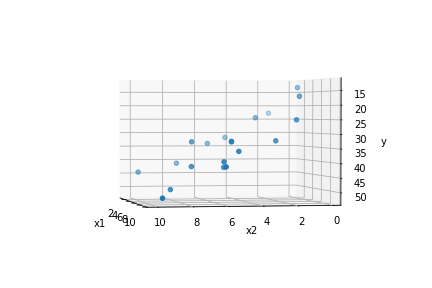

In [11]:
%matplotlib notebook
%run -i examples/example05.py

We can use the `LinearRegression` class from Scikit-Learn to create multiple regression models.

In [15]:
X = data.iloc[:,0:2] # 2 dimentional
y = data.iloc[:,2] # 1 dimentional

mlr = LinearRegression() #right now it doesnt know if it's simple LinearRegression and multiple LinearRegression
mlr.fit(X,y)
print(mlr.coef_)
print(mlr.intercept_)
print(mlr.score(X,y))

[ 1.56200761  2.24728567]
7.66908027085
0.799026769503


<IPython.core.display.Javascript object>


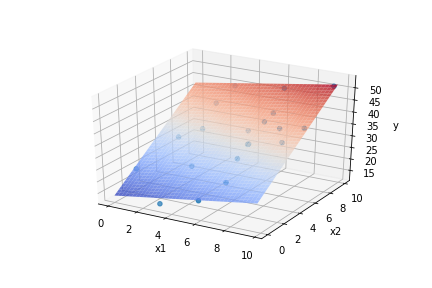

In [16]:
%matplotlib notebook
%run -i examples/example06.py

## Predicting MPG

We will now look at a real-world data set. In the next example, we will attempt to predict the MPG for a car based on the value of several feature values. The data set was collected in 1983, and contains information for 392 different car models. For each model, we have the following variables:

* **mpg** - Miles per gallon.
* **cyl** - Cylinders (3, 4, 5, 6, or 8).
* **disp** - Engine displacement. (volue inside cylinder)
* **hp** - Horsepower.
* **wt** - Weight.
* **acc** - Accereration.
* **year** - Year of manufacture.
* **origin** - Region where manufactured (1 = USA, 2 = Europe, 3 = Asia)
* **model** - Name of car model. 

In [18]:
mpg = pd.read_table(filepath_or_buffer='Datasets\\auto-mpg.txt', sep='\t')
mpg.head(n=10)

,mpg,cyl,disp,hp,wt,acc,year,origin,model
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl


We will create a regression model using columns 1 through 5 as features. 

In [21]:
X = mpg.iloc[:,1:6]
print(X.head())
#X = X.values.reshape(len(X),1)
y = mpg.iloc[:,0]

print(X.shape)

mpg_lm = LinearRegression()
mpg_lm.fit(X,y)

print(mpg_lm.intercept_)
print(mpg_lm.coef_)
print(mpg_lm.score(X,y))

   cyl   disp   hp    wt   acc
0    8  307.0  130  3504  12.0
1    8  350.0  165  3693  11.5
2    8  318.0  150  3436  11.0
3    8  304.0  150  3433  12.0
4    8  302.0  140  3449  10.5
(392, 5)
46.2643078526
[ -3.97928359e-01  -8.31301222e-05  -4.52570802e-02  -5.18691735e-03
  -2.91047140e-02]
0.707692632677


In [22]:
X = mpg.iloc[:,2:5]
y = mpg.iloc[:,0]

print(X.shape)

mpg_lm = LinearRegression()
mpg_lm.fit(X,y)

print(mpg_lm.intercept_)
print(mpg_lm.coef_)
print(mpg_lm.score(X,y))

(392, 3)
44.8559356953
[-0.00576882 -0.04167414 -0.00535159]
0.706955469344


In [26]:
X = mpg.iloc[:,[2,4]]
y = mpg.iloc[:,0]

print(X.shape)

mpg_lm = LinearRegression()
mpg_lm.fit(X,y)

print(mpg_lm.intercept_)
print(mpg_lm.coef_)
print(mpg_lm.score(X,y))

(392, 2)
43.7776193955
[-0.01649711 -0.00575113]
0.698966786779


In [25]:
X = mpg.iloc[:,[4]]
y = mpg.iloc[:,0]

print(X.shape)

mpg_lm = LinearRegression()
mpg_lm.fit(X,y)

print(mpg_lm.intercept_)
print(mpg_lm.coef_)
print(mpg_lm.score(X,y)) 

(392, 1)
46.216524549
[-0.00764734]
0.692630433121
